### load libraries

In [124]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
import matplotlib.pyplot as plt
import seaborn as sns

### load data

In [125]:
data_1 = pd.read_csv('D:/datasets/wellthy/CAX_CANCER_Updated_TRAIN_data.csv')

In [126]:
corr_matrix=data_1.corr() #to check correlation between "TD50_Rat_mg" and other features
k=corr_matrix['TD50_Rat_mg'].sort_values(ascending=False)

###### Some features gives the result as "NaN" that means they are not correlated at all so remove it

In [128]:
data = data_1.drop(['SssNH2count','SsssNHcount','SddsN(nitro)count','SsPH2count','SssPHcount','SsssPcount',
                  'SsssssPcount','SssNH2E-index','SsssNHE-index','SddsN(nitro)E-index','SsPH2E-index',
                  'SssPHE-index','SsssPE-index','SsssssPE-index','T_2_F_0','T_C_F_0','T_C_S_0','T_C_Cl_0',
                  'T_N_F_0','T_N_F_1','T_N_F_2','T_N_S_0','T_N_Cl_0','T_N_Cl_1','T_O_F_0','T_O_F_1','T_O_S_0',
                  'T_O_Cl_0','T_F_F_1','T_F_F_7','T_F_S_0','T_F_S_1','T_F_S_3','T_F_S_4','T_F_S_6','T_F_S_7',
                  'T_F_Cl_0','T_F_Cl_1','T_F_Cl_4','T_F_Cl_6','T_F_Cl_7','T_S_Cl_0','T_S_Cl_1','T_Cl_Cl_1'], axis=1)   

In [129]:
corr_matrix=data.corr() #to check correlation between "TD50_Rat_mg" and other features
l=corr_matrix['TD50_Rat_mg'].sort_values(ascending=False)

In [206]:
data.describe()

,CAX_ID,TD50_Rat_mg,Mol.Wt.,Volume,H-AcceptorCount,H-DonorCount,RotatableBondCount,XlogP,slogp,smr,...,T_S_Cl_5,T_S_Cl_6,T_S_Cl_7,T_Cl_Cl_0,T_Cl_Cl_2,T_Cl_Cl_3,T_Cl_Cl_4,T_Cl_Cl_5,T_Cl_Cl_6,T_Cl_Cl_7
count,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,...,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000
mean,631.725444,156.932159,207.067618,157.714529,3.115976,0.971598,4.907692,1.554302,1.796872,52.635305,...,0.005917,0.004734,0.001183,0.427219,0.072189,0.149112,0.149112,0.063905,0.016568,0.035503
std,386.314768,1365.031825,109.822569,77.111737,2.307682,1.164909,4.381510,2.192329,1.978193,28.565072,...,0.090878,0.068680,0.034401,1.152359,0.441610,1.007797,1.247373,0.557743,0.187804,0.375391
min,3.000000,0.000000,18.038000,22.404000,0.000000,0.000000,0.000000,-7.580000,-5.395600,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,305.000000,0.000000,128.173520,104.809000,2.000000,0.000000,2.000000,0.000000,0.452100,33.064200,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,596.000000,0.000000,187.065000,143.537000,3.000000,1.000000,4.000000,1.367000,1.657700,47.349800,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,999.000000,3.710000,266.187000,199.518000,4.000000,2.000000,7.000000,2.903000,2.915140,69.862100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1300.000000,25700.000000,959.171400,523.316000,15.000000,8.000000,32.000000,12.407000,11.477300,178.194000,...,2.000000,1.000000,1.000000,11.000000,6.000000,15.000000,23.000000,11.000000,4.000000,6.000000


## Data visualization

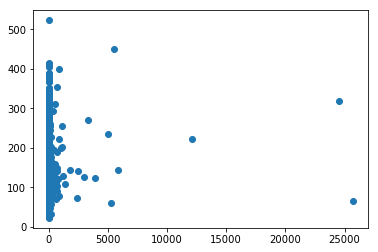

In [154]:
plt.scatter(data['TD50_Rat_mg'], data['Volume'], s=None, c=None, marker=None, cmap=None, norm=None, vmin=None,
            vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, data=None)
plt.show()

##### from above graph we get the insight that those two features are not too correlated 

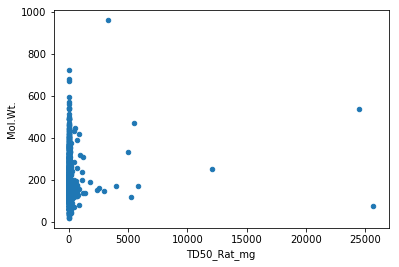

In [156]:
data.plot.scatter(x='TD50_Rat_mg', y='Mol.Wt.')
plt.show()

##### from above graph we get the insight that those two features are not too correlated 

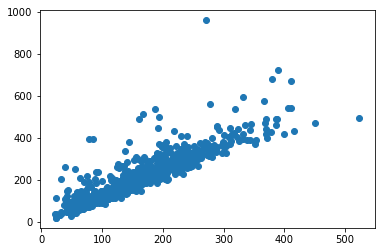

In [155]:
plt.scatter(data['Volume'], data['Mol.Wt.'])
plt.show()

##### while on the other hand "volume" and "Mol.Wt." are highly correlated

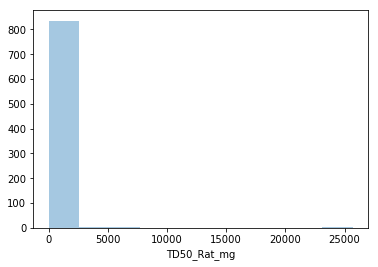

In [205]:
sns.distplot(data['TD50_Rat_mg'], bins=10, kde=False)
plt.show()

###### the label data is non-uniform maximum values are near zero

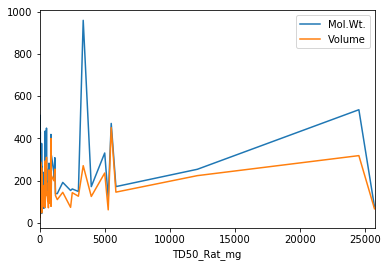

In [158]:
a=data.groupby(['TD50_Rat_mg']).mean()[['Mol.Wt.','Volume']]
a.plot.line()
plt.show()

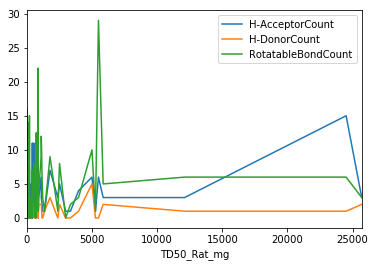

In [159]:
b=data.groupby(['TD50_Rat_mg']).mean()[['H-AcceptorCount','H-DonorCount','RotatableBondCount']]
b.plot.line()
plt.show()

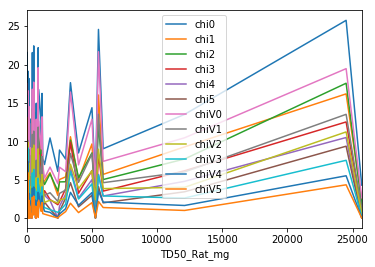

In [160]:
c=data.groupby(['TD50_Rat_mg']).mean()[['chi0','chi1','chi2','chi3','chi4','chi5',
                                        'chiV0','chiV1','chiV2','chiV3','chiV4','chiV5']]
c.plot.line()
plt.show()

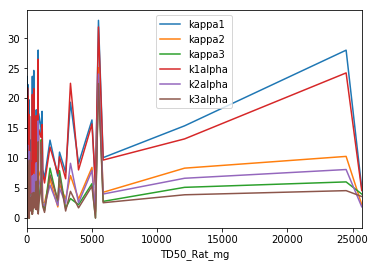

In [161]:
d=data.groupby(['TD50_Rat_mg']).mean()[['kappa1','kappa2','kappa3','k1alpha','k2alpha','k3alpha']]
d.plot.line()
plt.show()

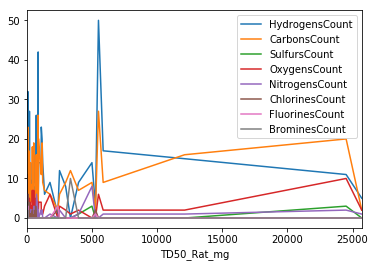

In [163]:
e=data.groupby(['TD50_Rat_mg']).mean()[['HydrogensCount','CarbonsCount','SulfursCount','OxygensCount',
                                        'NitrogensCount','ChlorinesCount','FluorinesCount','BrominesCount']]
e.plot.line()
plt.show()

##### in above line plots it looks like those features are highly correlated and its similar high peaks when the value of "TD50" around 5000

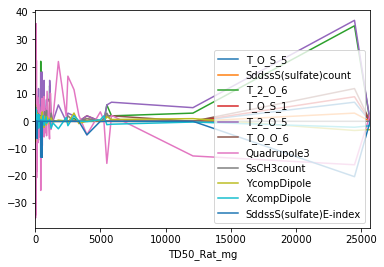

In [169]:
f=data.groupby(['TD50_Rat_mg']).mean()[['T_O_S_5','SddssS(sulfate)count','T_2_O_6','T_O_S_1','T_2_O_5','T_O_O_6',
                                        'Quadrupole3','SsCH3count','YcompDipole',
                                        'XcompDipole','SddssS(sulfate)E-index']]
f.plot.line()
plt.show()

##### line plot between the most correlated features, values of features are high around low value of "TD50" and high again around 25000 value of 'TD50

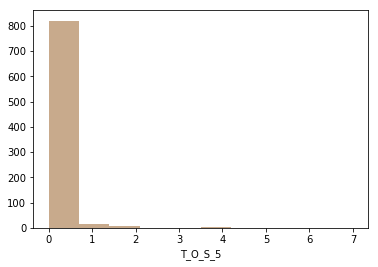

In [167]:
sns.distplot(data['T_O_S_5'], bins=10, kde=False)
plt.show()

##### count graph for the most correlated feature "T_O_S_5", maximum values is around Zero

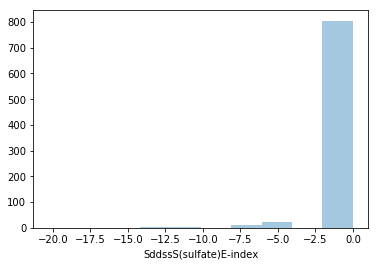

In [168]:
sns.distplot(data['SddssS(sulfate)E-index'], bins=10, kde=False)
plt.show()

##### count graph for the other most correlated feature "SddssS(sulfate)E-index", maximum values is around Zero

In [189]:
test_1 = pd.read_csv('D:/datasets/wellthy/CAX_CANCER_TEST_data.csv')

In [190]:
test = test_1.drop(['SssNH2count','SsssNHcount','SddsN(nitro)count','SsPH2count','SssPHcount','SsssPcount',
                  'SsssssPcount','SssNH2E-index','SsssNHE-index','SddsN(nitro)E-index','SsPH2E-index',
                  'SssPHE-index','SsssPE-index','SsssssPE-index','T_2_F_0','T_C_F_0','T_C_S_0','T_C_Cl_0',
                  'T_N_F_0','T_N_F_1','T_N_F_2','T_N_S_0','T_N_Cl_0','T_N_Cl_1','T_O_F_0','T_O_F_1','T_O_S_0',
                  'T_O_Cl_0','T_F_F_1','T_F_F_7','T_F_S_0','T_F_S_1','T_F_S_3','T_F_S_4','T_F_S_6','T_F_S_7',
                  'T_F_Cl_0','T_F_Cl_1','T_F_Cl_4','T_F_Cl_6','T_F_Cl_7','T_S_Cl_0','T_S_Cl_1','T_Cl_Cl_1'], axis=1)

In [191]:
data = data.fillna(data.mean(), inplace = True)

In [192]:
test = test.fillna(test.mean(), inplace = True)

In [194]:
#test

In [195]:
x_data = data.drop(['TD50_Rat_mg'], axis=1) #Features

In [196]:
y_data = data['TD50_Rat_mg'] #labels

In [197]:
# split the data in training and validation set
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.40, random_state=42) 

In [198]:
#x_val

In [199]:
x_test = test.drop(['TD50'], axis=1)

In [200]:
#x_test

In [201]:
# scaling the data to feed it to algo
x_train_scale = preprocessing.scale(x_train)
x_val_scale = preprocessing.scale(x_val)

D:\Softwares\anacond33\lib\site-packages\numpy\core\_methods.py:116: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\Softwares\anacond33\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
D:\Softwares\anacond33\lib\site-packages\numpy\core\_methods.py:117: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


In [202]:
x_train_scale=pd.DataFrame(x_train_scale)
x_val_scale = pd.DataFrame(x_val_scale)

In [144]:
#x_train_scale

In [204]:
#x_test_scale = preprocessing.scale(x_test)

In [146]:
y_train_scale = preprocessing.scale(y_train)
y_val_scale = preprocessing.scale(y_val)

In [147]:
y_train_scale=pd.DataFrame(y_train_scale)
y_val_scale=pd.DataFrame(y_val_scale)
#y_train_scale

##### This data has 845 rows × 485 columns. So many features causes curse of dimentionallity so to decrease the number of features we will use PCA

In [148]:
pca = PCA(n_components=338)
x_train_tran=pca.fit_transform(x_train_scale)
x_val_tran=pca.fit_transform(x_val_scale)

In [149]:
x_train_tran = pd.DataFrame(x_train_tran)
x_val_tran = pd.DataFrame(x_val_tran)

In [150]:
#x_train_tran

#### Random Forest

In [151]:
rf_regr = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=1500, n_jobs=-1)
rf_regr.fit(x_train_tran, y_train_scale)

D:\Softwares\anacond33\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1500, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [152]:
rf_pred = rf_regr.predict(x_val_tran)

In [153]:
r2_score(y_val_scale, rf_pred)

0.008037767312649602

#### SVM

In [78]:
svm_regr = SVR(kernel='rbf', C=10, gamma=10, degree=5)
svm_regr.fit(x_train_tran, y_train_scale)

D:\Softwares\anacond33\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=10, cache_size=200, coef0=0.0, degree=5, epsilon=0.1, gamma=10,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [79]:
svm_pred = svm_regr.predict(x_val_tran)

In [80]:
r2_score(y_val_scale, svm_pred)

-0.0047565535893381305

#### Adaboost 

In [81]:
ada_regr = AdaBoostRegressor(base_estimator=None, n_estimators=100, learning_rate=0.01, loss='linear', random_state=None)
ada_regr.fit(x_train_tran, y_train_scale)

D:\Softwares\anacond33\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(base_estimator=None, learning_rate=0.01, loss='linear',
         n_estimators=100, random_state=None)

In [82]:
ada_pred = ada_regr.predict(x_val_tran)

In [83]:
r2_score(y_val_scale, ada_pred)

-0.004911264012988248

### it looks like Random Forest is giving the best results

### There are many features that are predictive in nature in this dataset, features values that has more then 75% of data zero are hard to predict